<a href="https://colab.research.google.com/github/amrahmani/Machine-Learning/blob/main/Ch8_GenerativeAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Read Kaggle Datasets in Google Colab**


**1. Get Your Kaggle API Token:**

Go to the Kaggle website (https://www.kaggle.com/) and log in to your account. Navigate to your account settings by clicking on your profile picture in the top right corner and selecting "Account." Click on the “Settings” button. Scroll down to the "API" section. Click on the "Create New API Token" button. This will download a file named kaggle.json to your computer. This file contains your Kaggle API credentials.

**2. Upload Your Kaggle API Token to Google Colab:**

Open your Google Colab notebook. In the left sidebar, click on the "Files" icon. Click the "Upload" button. Select the kaggle.json file that you downloaded and upload it to the Colab environment, **or run the following cell.**



In [ ]:
from google.colab import files
files.upload() # This will open a file picker. Select your kaggle.json file.

KeyboardInterrupt: 

**3. Install the Kaggle API Client in Colab:**

In a code cell in your Colab notebook, run the following command to install the Kaggle API client:

In [ ]:
!pip install -q kaggle

**4. Configure the Kaggle API Credentials**:

In a new code cell, run the following commands to create the .kaggle directory and move the kaggle.json file into it with the correct permissions:

In [ ]:
!mkdir -p ~/.kaggle/
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls -al

total 20
drwxr-xr-x 1 root root 4096 Sep  2 01:01 .
drwxr-xr-x 1 root root 4096 Sep  2 00:58 ..
drwxr-xr-x 4 root root 4096 Aug 28 13:42 .config
drwxr-xr-x 1 root root 4096 Sep  2 01:01 sample_data


**5. Download the Dataset from Kaggle:**

You need to know the name of the dataset as it appears on Kaggle. This usually follows the format username/dataset-name.
Go to the Kaggle dataset page you want to use. The dataset name is typically found below the dataset title (e.g., vijayuv/onlineretail).
In a new code cell in Colab, use the kaggle datasets download command followed by the dataset name and the -p flag to specify the directory where you want to download the files (e.g., ./data/).

In [ ]:
!kaggle datasets download -d himanshunakrani/iris-dataset -p ./data/
!ls -al ./data/

Dataset URL: https://www.kaggle.com/datasets/himanshunakrani/iris-dataset
License(s): CC0-1.0
  0% 0.00/0.98k [00:00<?, ?B/s]
100% 0.98k/0.98k [00:00<00:00, 3.97MB/s]
total 12
drwxr-xr-x 2 root root 4096 Aug 21 14:23 .
drwxr-xr-x 1 root root 4096 Aug 21 14:23 ..
-rw-r--r-- 1 root root 1006 Jul 20  2022 iris-dataset.zip


**6. Unzip the Dataset (if necessary):**

Most Kaggle datasets are downloaded as zip files. You'll need to unzip them to access the individual data files (like CSV files).

**7. Read the Data into Pandas:**

Once the dataset is unzipped, you can use the pandas library to read the data files (e.g., CSV files) into a DataFrame:

In [ ]:
!unzip ./data/*.zip -d ./data/
!ls -al ./data/

Archive:  ./data/iris-dataset.zip
  inflating: ./data/iris.csv         
total 16
drwxr-xr-x 2 root root 4096 Aug 21 14:24 .
drwxr-xr-x 1 root root 4096 Aug 21 14:23 ..
-rw-r--r-- 1 root root 3858 Jul 20  2022 iris.csv
-rw-r--r-- 1 root root 1006 Jul 20  2022 iris-dataset.zip


**Problem 1:** Visualizing Generative vs. Discriminative on Iris Dataset.

https://www.kaggle.com/datasets/himanshunakrani/iris-dataset

Load the Iris dataset from Kaggle and explore features to understand class distributions.

Implement **a discriminative model** like Logistic Regression, then train and evaluate accuracy to see boundary learning.

Fit **a generative model** such as Gaussian Naive Bayes, then generate synthetic samples to compare with originals.

Visualize decision boundaries. Compare how generative captures distributions holistically.
Discuss differences in Python code outputs.

Step 1: Loading and Exploring the Iris Dataset
Dataset loaded successfully.

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Class distribution:
speci

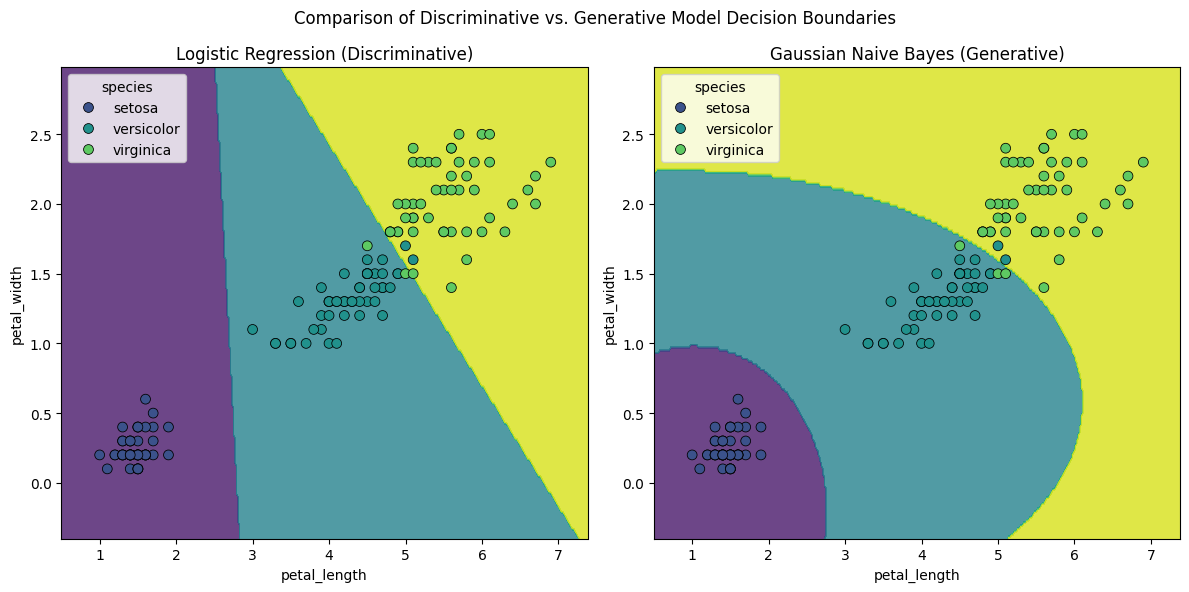



Step 5: Discussion - Python Code Outputs and Model Differences

Both models show high accuracy, but their approaches differ:
Logistic Regression (Discriminative):
- The model directly learns the **decision boundary** that separates the classes.
- The output of the visualization shows a straight line boundary (or a curved one in higher dimensions) that's optimized to separate the data points, without considering the internal distribution of each class.
- It focuses on **p(y|x)**, the probability of the class given the features.

Gaussian Naive Bayes (Generative):
- The model learns the **distribution of features within each class** and the prior probability of each class.
- The output of the visualization shows a curved boundary. This is because the model assumes a Gaussian (bell curve) distribution for each feature within each class and the boundary is a result of where these distributions intersect.
- It focuses on **p(x|y)**, the probability of the features given the class, and **p

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load the Iris dataset
print("Step 1: Loading and Exploring the Iris Dataset")
try:
    df = pd.read_csv('./data/iris.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file './data/iris.csv' was not found. Please ensure the file path is correct.")
    # Exit or handle the error gracefully
    exit()

print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())
print("\nClass distribution:")
print(df['species'].value_counts())

# Prepare data for modeling
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\n" + "="*50 + "\n")

# Step 2: Implement a Discriminative Model (Logistic Regression)
print("Step 2: Implementing a Discriminative Model (Logistic Regression)")
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print(f"Logistic Regression Model Accuracy: {lr_accuracy:.2f}")

# Step 3: Implement a Generative Model (Gaussian Naive Bayes)
print("\n" + "="*50 + "\n")
print("Step 3: Implementing a Generative Model (Gaussian Naive Bayes)")
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
gnb_predictions = gnb_model.predict(X_test)
gnb_accuracy = accuracy_score(y_test, gnb_predictions)
print(f"Gaussian Naive Bayes Model Accuracy: {gnb_accuracy:.2f}")

# Generate synthetic samples using the generative model
print("\nGenerating synthetic samples from the Gaussian Naive Bayes model...")
# Generate samples for each class
synthetic_samples_list = []
class_labels = y.unique()
for label in class_labels:
    # Get the mean and variance for the current class from the trained model
    class_index = np.where(gnb_model.classes_ == label)[0][0]
    mean = gnb_model.theta_[class_index]
    variance = gnb_model.var_[class_index]

    # Generate synthetic data points based on the learned distribution
    synthetic_samples = np.random.normal(loc=mean, scale=np.sqrt(variance), size=(20, 4))
    synthetic_df = pd.DataFrame(synthetic_samples, columns=X.columns)
    synthetic_df['species'] = label
    synthetic_samples_list.append(synthetic_df)

synthetic_df_all = pd.concat(synthetic_samples_list, ignore_index=True)
print("\nFirst 5 synthetic samples:")
print(synthetic_df_all.head())

print("\n" + "="*50 + "\n")

# Step 4: Visualize Decision Boundaries
print("Step 4: Visualizing Decision Boundaries (using two features for simplicity)")

# Select two features for 2D visualization
features_to_plot = ['petal_length', 'petal_width']
X_vis = X[features_to_plot]
y_vis = y

# Encode target variable for visualization models
le = LabelEncoder()
y_vis_encoded = le.fit_transform(y_vis)


# Create a meshgrid to plot decision boundaries
x_min, x_max = X_vis.iloc[:, 0].min() - 0.5, X_vis.iloc[:, 0].max() + 0.5
y_min, y_max = X_vis.iloc[:, 1].min() - 0.5, X_vis.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Plot for Logistic Regression (Discriminative)
lr_vis = LogisticRegression(max_iter=200)
lr_vis.fit(X_vis, y_vis_encoded) # Use encoded target

# Convert meshgrid to DataFrame with feature names
meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=features_to_plot)

# Predict on meshgrid (predictions are already encoded numerical values)
Z_lr = lr_vis.predict(meshgrid_df)
Z_lr = Z_lr.reshape(xx.shape)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_lr, alpha=0.8)
sns.scatterplot(x=X_vis.iloc[:, 0], y=X_vis.iloc[:, 1], hue=y_vis, palette='viridis', marker='o', s=50, edgecolor='k') # Use original y_vis for hue
plt.title('Logistic Regression (Discriminative)')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
plt.suptitle('Comparison of Discriminative vs. Generative Model Decision Boundaries')

# Plot for Gaussian Naive Bayes (Generative)
gnb_vis = GaussianNB()
gnb_vis.fit(X_vis, y_vis_encoded) # Use encoded target

# Convert meshgrid to DataFrame with feature names
meshgrid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=features_to_plot)

# Predict on meshgrid (predictions are already encoded numerical values)
Z_gnb = gnb_vis.predict(meshgrid_df)
Z_gnb = Z_gnb.reshape(xx.shape)


plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_gnb, alpha=0.8)
sns.scatterplot(x=X_vis.iloc[:, 0], y=X_vis.iloc[:, 1], hue=y_vis, palette='viridis', marker='o', s=50, edgecolor='k') # Use original y_vis for hue
plt.title('Gaussian Naive Bayes (Generative)')
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
plt.tight_layout()
plt.show()

print("\n" + "="*50 + "\n")

# Step 5: Discussion of Differences
print("Step 5: Discussion - Python Code Outputs and Model Differences")
print("\nBoth models show high accuracy, but their approaches differ:")
print("Logistic Regression (Discriminative):")
print("- The model directly learns the **decision boundary** that separates the classes.")
print("- The output of the visualization shows a straight line boundary (or a curved one in higher dimensions) that's optimized to separate the data points, without considering the internal distribution of each class.")
print("- It focuses on **p(y|x)**, the probability of the class given the features.")

print("\nGaussian Naive Bayes (Generative):")
print("- The model learns the **distribution of features within each class** and the prior probability of each class.")
print("- The output of the visualization shows a curved boundary. This is because the model assumes a Gaussian (bell curve) distribution for each feature within each class and the boundary is a result of where these distributions intersect.")
print("- It focuses on **p(x|y)**, the probability of the features given the class, and **p(y)**, the prior probability of the class.")

print("\nSynthetic Sample Generation:")
print("- The ability to generate new samples is a key feature of generative models.")
print("- Our Gaussian Naive Bayes model learned the mean and variance of each feature for each class and used these parameters to create new, synthetic data points that follow a similar distribution to the original data.")
print("- This is not possible with a discriminative model like Logistic Regression.")

**Problem 2:** Synthetic Data Generation with MNIST

Download MNIST and load with PyTorch. Visualize digits to grasp data structure.
Use numpy to generate simple synthetic images via noise addition. Compare with real samples to simulate the basics of generative models.
Implement a basic autoencoder in PyTorch for reconstruction. Train on a subset to understand latent representations.
Evaluate generated digits using mean squared error. Plot originals vs. synthetics with matplotlib.
Extend to data augmentation for classification.



Step 1: Downloading and Loading MNIST Dataset


100%|██████████| 9.91M/9.91M [00:00<00:00, 57.2MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.69MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.65MB/s]


MNIST dataset loaded successfully.

Visualizing some sample digits from the dataset:


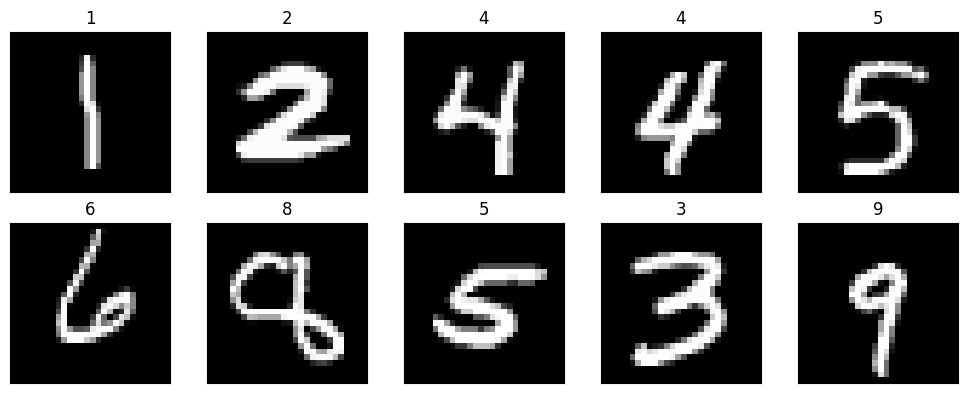



Step 2: Generating Simple Synthetic Images with Noise Addition


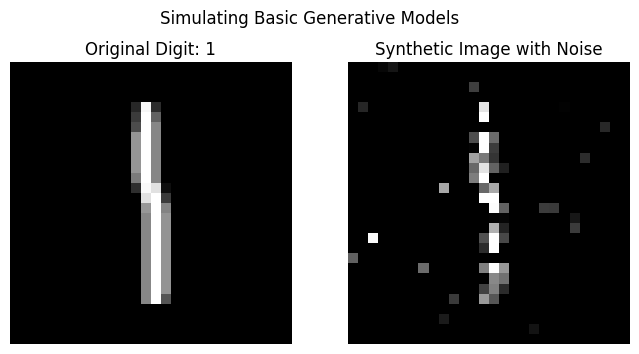


Discussion: This simple noise addition demonstrates the basic concept of creating new data that shares some characteristics with the original, a core idea in generative modeling. However, more advanced models learn the underlying data distribution to create more realistic and complex samples.


Step 3: Implementing a Basic Autoencoder in PyTorch
Autoencoder model architecture:
Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=12, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=12, out_features=64, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=128, out_features=784, bias=True)
    (5): Tanh()
  )
)

Training the Autoencoder...
Epoch [1/10], Loss: 0.1

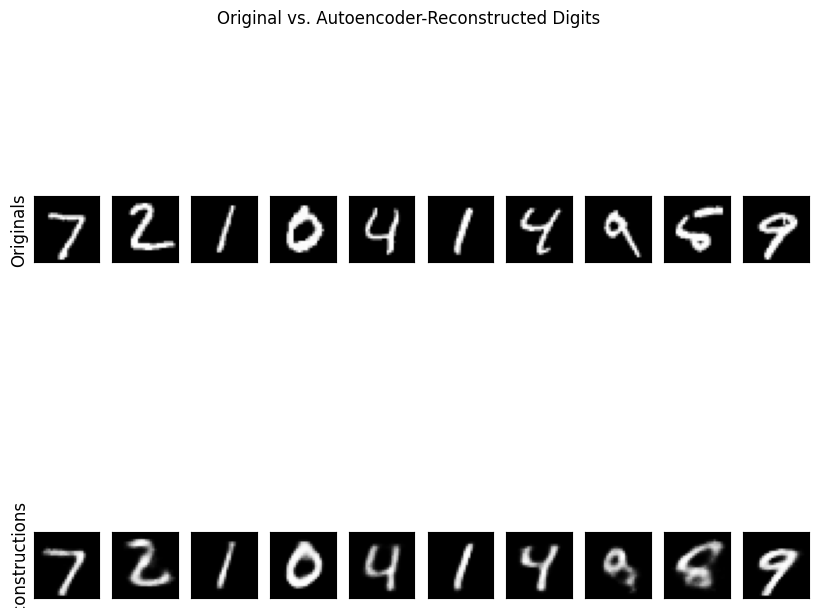

Mean Squared Error (MSE) between original and reconstructed digits: 0.0607

Discussion: The low MSE indicates that the autoencoder can effectively reconstruct the original images. The reconstruction shows the model has learned a meaningful latent representation of the data, which is a fundamental concept behind many more complex generative models like VAEs and GANs.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Download and load MNIST data with PyTorch
print("Step 1: Downloading and Loading MNIST Dataset")
# Define a transform to normalize the data and convert it to a tensor
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download and load the training and test datasets
# The root directory for the data will be './data'
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders to iterate through the datasets in batches
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("MNIST dataset loaded successfully.")

# Visualize some sample digits
print("\nVisualizing some sample digits from the dataset:")
# Get a batch of data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid of images
fig = plt.figure(figsize=(10, 4))
for i in range(10):
    ax = fig.add_subplot(2, 5, i + 1, xticks=[], yticks=[])
    # Reverse the normalization for display
    img = images[i].numpy().squeeze()
    img = img * 0.5 + 0.5
    ax.imshow(img, cmap='gray')
    ax.set_title(str(labels[i].item()))
plt.tight_layout()
plt.show()

print("\n" + "="*50 + "\n")

# Step 2: Generate simple synthetic images with noise
print("Step 2: Generating Simple Synthetic Images with Noise Addition")
# Get an original image
original_image = images[0].numpy().squeeze()
original_label = labels[0].item()

# Add random noise to the image
noise = np.random.normal(0, 0.5, original_image.shape)
noisy_image = original_image + noise
noisy_image = np.clip(noisy_image, 0, 1) # Clip values to be within [0, 1] range

# Plot the original and noisy images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(original_image, cmap='gray')
ax1.set_title(f"Original Digit: {original_label}")
ax1.axis('off')

ax2.imshow(noisy_image, cmap='gray')
ax2.set_title("Synthetic Image with Noise")
ax2.axis('off')

plt.suptitle("Simulating Basic Generative Models")
plt.show()

print("\nDiscussion: This simple noise addition demonstrates the basic concept of creating new data that shares some characteristics with the original, a core idea in generative modeling. However, more advanced models learn the underlying data distribution to create more realistic and complex samples.")

print("\n" + "="*50 + "\n")

# Step 3: Implement a basic Autoencoder in PyTorch
print("Step 3: Implementing a Basic Autoencoder in PyTorch")
# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12)  # Latent representation
        )
        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
            nn.Tanh()  # Use Tanh to match the normalized input range [-1, 1]
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        x = self.encoder(x)
        x = self.decoder(x)
        x = x.view(x.size(0), 1, 28, 28)  # Reshape back to image
        return x

# Instantiate the model
model = Autoencoder()
print("Autoencoder model architecture:")
print(model)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the autoencoder
print("\nTraining the Autoencoder...")
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, _ in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        # Forward pass: get reconstructed images
        reconstructed = model(images)
        # Calculate the loss
        loss = criterion(reconstructed, images)
        # Backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # Perform a single optimization step
        optimizer.step()
        running_loss += loss.item() * images.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")

print("Training finished.")

print("\n" + "="*50 + "\n")

# Step 4: Evaluate and visualize generated digits
print("Step 4: Evaluating and Visualizing Generated Digits")
# Get a batch of test data
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Reconstruct the images
reconstructed_images = model(images).detach().cpu().numpy()

# Plot originals vs. reconstructions
fig = plt.figure(figsize=(10, 8))
for i in range(10):
    # Original images
    ax = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
    original_img = images[i].numpy().squeeze()
    original_img = original_img * 0.5 + 0.5 # De-normalize
    ax.imshow(original_img, cmap='gray')
    if i == 0:
        ax.set_ylabel('Originals', fontsize=12)

    # Reconstructed images
    ax = fig.add_subplot(2, 10, i + 11, xticks=[], yticks=[])
    reconstructed_img = reconstructed_images[i].squeeze()
    reconstructed_img = reconstructed_img * 0.5 + 0.5 # De-normalize
    ax.imshow(reconstructed_img, cmap='gray')
    if i == 0:
        ax.set_ylabel('Reconstructions', fontsize=12)

plt.suptitle("Original vs. Autoencoder-Reconstructed Digits")
plt.show()

# Calculate Mean Squared Error (MSE) for evaluation
mse = np.mean((images.numpy() - reconstructed_images)**2)
print(f"Mean Squared Error (MSE) between original and reconstructed digits: {mse:.4f}")

print("\nDiscussion: The low MSE indicates that the autoencoder can effectively reconstruct the original images. The reconstruction shows the model has learned a meaningful latent representation of the data, which is a fundamental concept behind many more complex generative models like VAEs and GANs.")

**Problem 3:** Generative AI in Image Synthesis

Using PyTorch, models train on datasets like CelebA. This creates diverse facial images practically.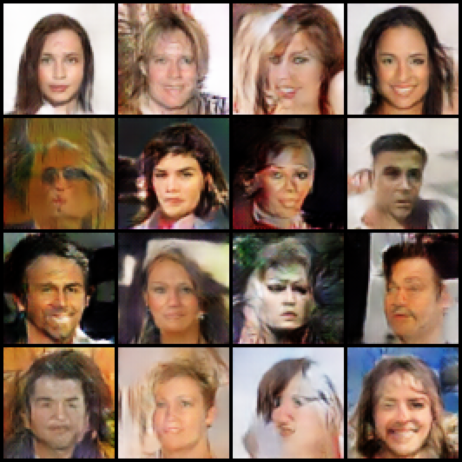

In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset -p ./data/
!ls -al ./data/

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 98% 1.31G/1.33G [00:17<00:00, 279MB/s]
100% 1.33G/1.33G [00:17<00:00, 81.9MB/s]
total 1394304
drwxr-xr-x 2 root root       4096 Sep  2 01:02 .
drwxr-xr-x 1 root root       4096 Sep  2 01:02 ..
-rw-r--r-- 1 root root 1427750792 Oct  1  2019 celeba-dataset.zip


In [ ]:
!unzip ./data/*.zip -d ./data/
# !ls -al ./data/

Archive:  ./data/celeba-dataset.zip
replace ./data/img_align_celeba/img_align_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace ./data/img_align_celeba/img_align_celeba/000002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
# DCGAN-like training on CelebA images stored in:
# ./data/img_align_celeba/img_align_celeba/*.jpg
# Works in Google Colab. Tested structure: provided list_attr_celeba.csv etc.
# Run with GPU runtime for best speed.

import os
import random
from glob import glob # find pathnames matching a specified pattern
from tqdm import tqdm # the progress bar you see when a file is downloading

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt

# ----------------------
# CONFIG
# ----------------------
DATA_DIR = "./data/img_align_celeba/img_align_celeba"  # path to folder with images
OUT_DIR = "./outputs"
os.makedirs(OUT_DIR, exist_ok=True)

SEED = 42
random.seed(SEED)
torch.manual_seed(SEED)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

# Hyperparams
image_size = 64         # output size (64x64)
batch_size = 128
latent_dim = 100
num_epochs = 8
lr = 2e-4
beta1 = 0.5
num_workers = 2
save_every = 1          # save sample grid every `save_every` epochs
drop_last = True

# ----------------------
# Custom Dataset (single folder of images)
# ----------------------
class SingleFolderImageDataset(Dataset):
    def __init__(self, folder, transform=None, extensions=("jpg", "jpeg", "png")):
        self.files = []
        for ext in extensions:
            self.files += glob(os.path.join(folder, f"*.{ext}"))
        self.files = sorted(self.files)
        if len(self.files) == 0:
            raise RuntimeError(f"No images found in {folder} with extensions: {extensions}")
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        path = self.files[idx]
        img = Image.open(path).convert("RGB")
        if self.transform is not None:
            img = self.transform(img)
        return img

# ----------------------
# Transforms
# ----------------------
transform = transforms.Compose([
    transforms.CenterCrop(178),           # CelebA images are 178x218
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),  # map to [-1,1]
])

dataset = SingleFolderImageDataset(DATA_DIR, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True,
                        num_workers=num_workers, pin_memory=True, drop_last=drop_last)

# ----------------------
# Model definitions (DCGAN-like)
# ----------------------
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1 or classname.find('ConvTranspose') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        if getattr(m, "bias", None) is not None:
            nn.init.zeros_(m.bias.data)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.zeros_(m.bias.data)
    elif classname.find("Linear") != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
        if getattr(m, "bias", None) is not None:
            nn.init.zeros_(m.bias.data)

class Generator(nn.Module):
    def __init__(self, z_dim=latent_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(z_dim, 256 * 8 * 8, bias=True),
            nn.ReLU(inplace=True),
            nn.Unflatten(1, (256, 8, 8)),  # (N,256,8,8)
            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),  # 8->16
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),   # 16->32
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 32, 4, 2, 1, bias=False),    # 32->64
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            # final conv to 3 channels (keep size)
            nn.Conv2d(32, 3, 3, 1, 1, bias=True),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 32, 4, 2, 1, bias=True),   # 64->32
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(32, 64, 4, 2, 1, bias=False), # 32->16
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),# 16->8
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),# 8->4
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1, bias=True)   # logits (no sigmoid)
        )

    def forward(self, img):
        return self.net(img).view(-1, 1)

# ----------------------
# Setup
# ----------------------
G = Generator().to(device)
D = Discriminator().to(device)
G.apply(weights_init)
D.apply(weights_init)

criterion = nn.BCEWithLogitsLoss()   # stable combination with logits from D
optG = optim.Adam(G.parameters(), lr=lr, betas=(beta1, 0.999))
optD = optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))

fixed_z = torch.randn(16, latent_dim, device=device)

# Utility to save image grid
def save_grid(tensor, path, nrow=4):
    grid = torchvision.utils.make_grid((tensor + 1) / 2, nrow=nrow, normalize=False)  # map to [0,1]
    ndarr = grid.permute(1, 2, 0).cpu().numpy()
    plt.figure(figsize=(6,6))
    plt.axis('off')
    plt.imshow(ndarr)
    plt.savefig(path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Label helpers
def real_labels(size, device=device, smooth=0.0):
    return torch.full((size,1), 1.0 - smooth, device=device)
def fake_labels(size, device=device):
    return torch.zeros((size,1), device=device)

# ----------------------
# Training loop
# ----------------------
def train():
    print("Starting training. Dataset size:", len(dataset))
    for epoch in range(1, num_epochs + 1):
        prog = tqdm(enumerate(dataloader), total=len(dataloader), desc=f"Epoch {epoch}/{num_epochs}")
        for i, real_imgs in prog:
            real_imgs = real_imgs.to(device, non_blocking=True)
            bsz = real_imgs.size(0)

            # ---- Train Discriminator ----
            D.zero_grad(set_to_none=True)
            logits_real = D(real_imgs)
            labels_real = real_labels(bsz, device=device, smooth=0.0)
            d_loss_real = criterion(logits_real, labels_real)

            z = torch.randn(bsz, latent_dim, device=device)
            fake_imgs = G(z)
            logits_fake = D(fake_imgs.detach())
            labels_fake = fake_labels(bsz, device=device)
            d_loss_fake = criterion(logits_fake, labels_fake)

            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optD.step()

            # ---- Train Generator ----
            G.zero_grad(set_to_none=True)
            logits_fake_for_g = D(fake_imgs)
            g_loss = criterion(logits_fake_for_g, labels_real)  # trick D to predict real
            g_loss.backward()
            optG.step()

            if (i % 100) == 0:
                prog.set_postfix(D_loss=f"{d_loss.item():.4f}", G_loss=f"{g_loss.item():.4f}")

        # Save sample grid each epoch
        if epoch % save_every == 0:
            with torch.no_grad():
                samples = G(fixed_z)
                save_grid(samples, os.path.join(OUT_DIR, f"sample_epoch_{epoch:03d}.png"), nrow=4)

        # Optional: save checkpoints
        torch.save({
            "epoch": epoch,
            "G_state": G.state_dict(),
            "D_state": D.state_dict(),
            "optG": optG.state_dict(),
            "optD": optD.state_dict()
        }, os.path.join(OUT_DIR, f"checkpoint_epoch_{epoch:03d}.pt"))

    print("Training finished. Final samples saved to", OUT_DIR)

# ----------------------
# Run (safeguard for dataloader worker spawn)
# ----------------------
if __name__ == "__main__":
    train()

Device: cuda
Starting training. Dataset size: 202599


Epoch 8/8: 100%|██████████| 1582/1582 [03:01<00:00,  8.72it/s, D_loss=0.9580, G_loss=1.0553]


Training finished. Final samples saved to ./outputs


**Practice:**

**Task 1:** Change the Gaussian Naive Bayes model in the Iris activity to predict on the training data instead of the test data and note the accuracy difference.

**Task 2:** Generate 50 synthetic data points for only the 'Iris-virginica' species and plot them against the original data.

**Task 3:** Add the Fréchet Inception Distance (FID) to problem 1 to evaluate the similarity of generated classes.

**Task 4:** Expand the autoencoder's latent dimension to 50. What is the impact on reconstruction quality and the model's training time?

**Task 5:** In the MNIST autoencoder, reduce the number of epochs to 2. How does the mean squared error and reconstruction quality change?